In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline

### Exercise 1

In [2]:
df= pd.read_csv("canada_per_capita_income.csv")
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


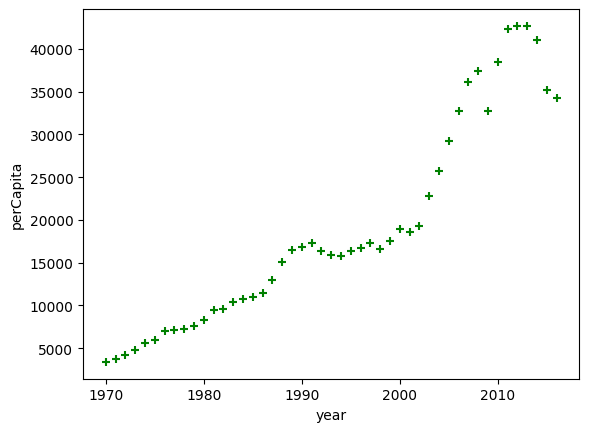

In [3]:
plt.xlabel("year")
plt.ylabel("perCapita")
plt.scatter(df.year,df["per capita income (US$)"],color="Green",marker='+')


In [4]:
new_df= df.drop("per capita income (US$)",axis='columns')
new_df=new_df.values

In [5]:
price=df["per capita income (US$)"]
price.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: per capita income (US$), dtype: float64

In [6]:
reg= linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [ ]:
plt.xlabel("year")
plt.ylabel("perCapita")
plt.scatter(df.year,df["per capita income (US$)"],color="Green",marker='+')
plt.plo

In [7]:
reg.predict([[2020]])

array([41288.69409442])

### Exercise 2

In [8]:
from word2number import w2n

In [9]:
df= pd.read_csv("hiring.csv")
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [10]:
df.experience.fillna("zero",inplace=True)
df["test_score(out of 10)"].fillna(df["test_score(out of 10)"].median(),inplace=True)
df.experience=df.experience.apply(w2n.word_to_num)
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000


In [11]:
reg=linear_model.LinearRegression()
x=df[["experience","test_score(out of 10)","interview_score(out of 10)"]]
x=x.values                                                                      # it turns dataframe into an array 
reg.fit(x,df["salary($)"])

LinearRegression()

In [12]:
reg.predict([[2,9,6]])

array([53205.96797671])

In [13]:
reg.predict([[12,10,10]])

array([92002.18340611])

### Exercise 3

In [14]:
df= pd.read_csv("test_scores.csv")
df

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [15]:
def gradient_descent(x,y):
    m_curr = b_curr = 0
    rate = 0.0002
    n = len(x)
    plt.scatter(x,y,color='red',marker='+',linewidth=5)
    for i in range(1000):
        y_predicted = m_curr * x + b_curr
        cost=(1/n)*sum((y-y_predicted)**2)
        print(f"m_curr {m_curr},b_curr {b_curr},cost {cost},{i}")
        plt.plot(x,y_predicted,color='green')
        md = -(2/n)*sum(x*(y-y_predicted))
        yd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - rate * md
        b_curr = b_curr - rate * yd
        

In [16]:
x = df.math
y = df.cs

m_curr 0,b_curr 0,cost 5199.1,0
m_curr 1.9783600000000003,b_curr 0.027960000000000002,cost 4161.482445460163,1
m_curr 0.20975041279999962,b_curr 0.0030470367999999894,cost 3332.2237319269248,2
m_curr 1.7908456142986242,b_curr 0.025401286955264,cost 2669.4843523161976,3
m_curr 0.37738163667530467,b_curr 0.005499731626422651,cost 2139.826383775145,4
m_curr 1.6409848166378898,b_curr 0.023373894401807944,cost 1716.5264071567592,5
m_curr 0.5113514173939655,b_curr 0.0074774305434828076,cost 1378.2272007804495,6
m_curr 1.5212165764726306,b_curr 0.021771129698498662,cost 1107.8601808918404,7
m_curr 0.6184191426785134,b_curr 0.009075514323270572,cost 891.7842215178443,8
m_curr 1.4254981563597626,b_curr 0.020507724625171385,cost 719.0974036421305,9
m_curr 0.7039868810749315,b_curr 0.010370210797388455,cost 581.0869686205,10
m_curr 1.3490002310389348,b_curr 0.01951553325074733,cost 470.7897237271261,11
m_curr 0.7723719384951477,b_curr 0.01142244086408669,cost 382.6407204862143,12
m_curr 1.2878632

m_curr 1.044323143115777,b_curr 0.031074347813406133,cost 31.808302759777362,376
m_curr 1.0443225327381676,b_curr 0.031117603690227213,cost 31.808293402667562,377
m_curr 1.0443219223745706,b_curr 0.031160858573987284,cost 31.808284045987392,378
m_curr 1.044321312024987,b_curr 0.031204112464709166,cost 31.808274689736898,379
m_curr 1.0443207016894147,b_curr 0.03124736536241563,cost 31.808265333915944,380
m_curr 1.0443200913678552,b_curr 0.031290617267129506,cost 31.808255978524553,381
m_curr 1.044319481060307,b_curr 0.03133386817887356,cost 31.808246623562738,382
m_curr 1.04431887076677,b_curr 0.03137711809767061,cost 31.80823726903043,383
m_curr 1.0443182604872445,b_curr 0.03142036702354344,cost 31.80822791492767,384
m_curr 1.0443176502217293,b_curr 0.031463614956514854,cost 31.8082185612544,385
m_curr 1.0443170399702244,b_curr 0.03150686189660764,cost 31.808209208010567,386
m_curr 1.0443164297327303,b_curr 0.0315501078438446,cost 31.80819985519622,387
m_curr 1.0443158195092448,b_curr 

m_curr 1.044177660687382,b_curr 0.04138430988107386,cost 31.80607858552408,615
m_curr 1.0441770536497332,b_curr 0.041427329063554584,cost 31.80606933053754,616
m_curr 1.0441764466260204,b_curr 0.04147034725840829,cost 31.80606007597595,617
m_curr 1.0441758396162435,b_curr 0.04151336446565766,cost 31.806050821839264,618
m_curr 1.0441752326204023,b_curr 0.04155638068532537,cost 31.806041568127483,619
m_curr 1.0441746256384967,b_curr 0.04159939591743409,cost 31.80603231484061,620
m_curr 1.0441740186705255,b_curr 0.04164241016200649,cost 31.80602306197862,621
m_curr 1.0441734117164894,b_curr 0.04168542341906524,cost 31.80601380954141,622
m_curr 1.0441728047763876,b_curr 0.04172843568863302,cost 31.80600455752908,623
m_curr 1.0441721978502196,b_curr 0.041771446970732484,cost 31.805995305941526,624
m_curr 1.0441715909379858,b_curr 0.04181445726538632,cost 31.8059860547788,625
m_curr 1.0441709840396847,b_curr 0.041857466572617186,cost 31.80597680404082,626
m_curr 1.0441703771553172,b_curr 0.0

m_curr 1.0440353893351866,b_curr 0.051466711313565734,cost 31.803915305964853,850
m_curr 1.0440347855637788,b_curr 0.05150949902600412,cost 31.803906150305576,851
m_curr 1.0440341818062322,b_curr 0.05155228575612955,cost 31.80389699506668,852
m_curr 1.0440335780625472,b_curr 0.05159507150396458,cost 31.803887840248155,853
m_curr 1.044032974332722,b_curr 0.05163785626953173,cost 31.80387868584996,854
m_curr 1.0440323706167578,b_curr 0.05168064005285359,cost 31.803869531872103,855
m_curr 1.044031766914653,b_curr 0.051723422853952684,cost 31.803860378314553,856
m_curr 1.0440311632264083,b_curr 0.051766204672851576,cost 31.80385122517726,857
m_curr 1.044030559552023,b_curr 0.05180898550957281,cost 31.80384207246026,858
m_curr 1.0440299558914967,b_curr 0.05185176536413893,cost 31.803832920163526,859
m_curr 1.0440293522448287,b_curr 0.051894544236572485,cost 31.803823768287,860
m_curr 1.0440287486120197,b_curr 0.05193732212689603,cost 31.80381461683065,861
m_curr 1.0440281449930686,b_curr 0.

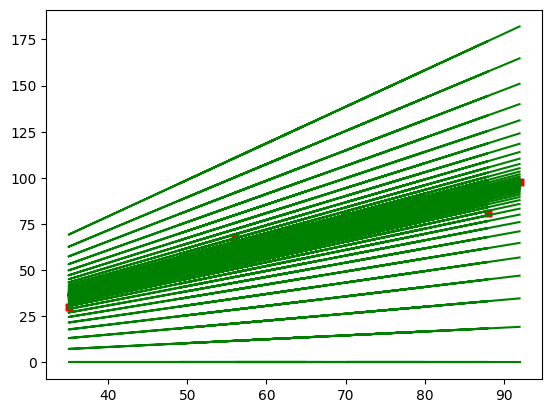

In [17]:
gradient_descent(x,y)

In [18]:
def predict_using_sklean():
    df = pd.read_csv("test_scores.csv")
    r = linear_model.LinearRegression()
    r.fit(df[['math']],df.cs)
    return r.coef_, r.intercept_,r.score(df[['math']],df.cs)

In [19]:
m_sklearn, b_sklearn,score = predict_using_sklean()
print("Using sklearn: Coef {} Intercept {}".format(m_sklearn,b_sklearn))
print(score)

Using sklearn: Coef [1.01773624] Intercept 1.9152193111568891
0.8990561457295679


### Exercise 4


In [20]:
cp= pd.read_csv("carprices.csv")
cp.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [21]:
dummies=pd.get_dummies(cp["Car Model"])
dummies=dummies.drop("Mercedez Benz C class",axis="columns")
merge=pd.concat([cp,dummies],axis="columns")
final=merge.drop("Car Model",axis="columns")
final.head()

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1


In [22]:
x=final.drop("Sell Price($)",axis="columns").values
y=final["Sell Price($)"]

model= linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

In [23]:
model.score(x,y)

0.9417050937281082

In [24]:
model.predict([[45000,4,0,0]])

array([36991.31721061])

In [25]:
model.predict([[86000,7,0,1]])

array([11080.74313219])

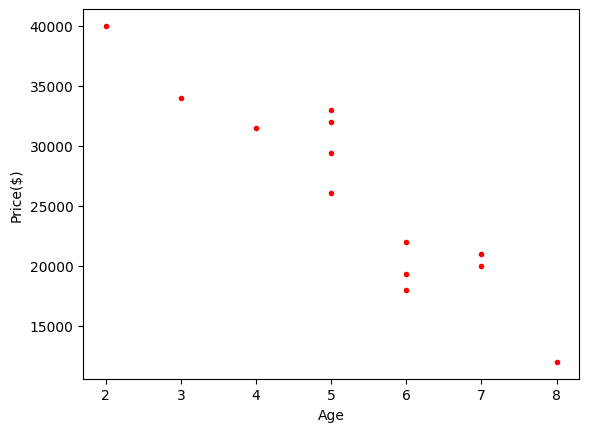

In [26]:
plt.xlabel("Age")
plt.ylabel("Price($)")
plt.scatter(cp["Age(yrs)"],y,color="red",marker=".")

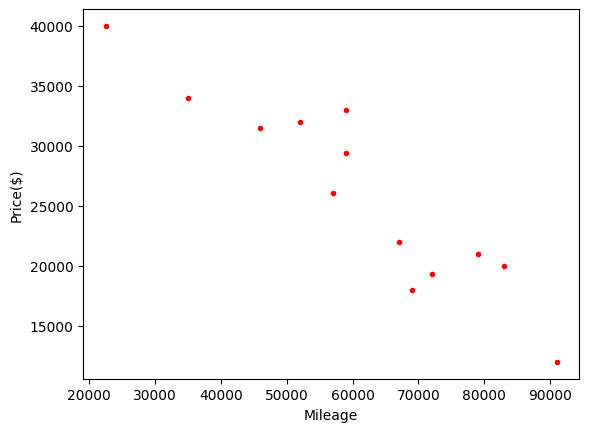

In [27]:
plt.xlabel("Mileage")
plt.ylabel("Price($)")
plt.scatter(cp["Mileage"],y,color="red",marker=".")
# plt.plot(cp["Mileage"],y)

### Training And Testing Available Data

In [28]:
carprice= pd.read_csv("carprice.csv")
carprice.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [29]:
x=carprice[['Mileage','Age(yrs)']]
y=carprice['Sell Price($)']

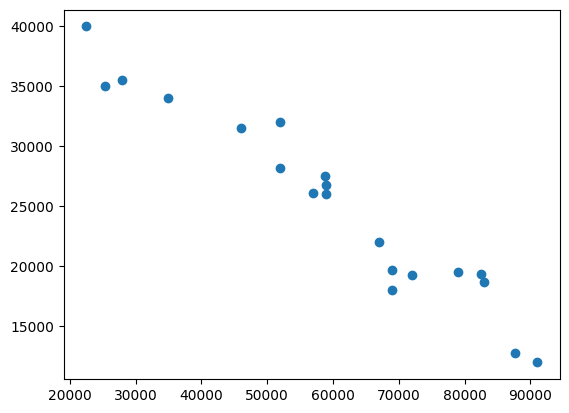

In [30]:
plt.scatter(carprice['Mileage'],carprice['Sell Price($)'])

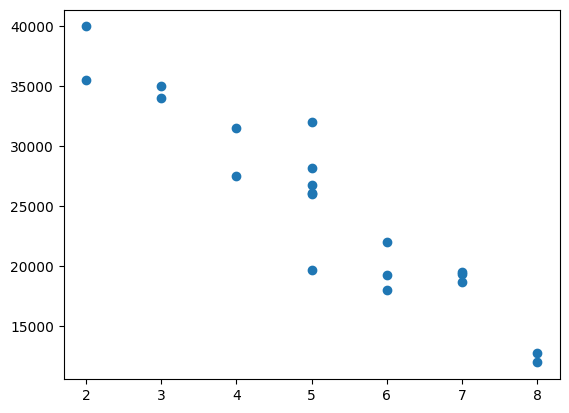

In [31]:
plt.scatter(carprice['Age(yrs)'],carprice['Sell Price($)'])

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.25,random_state=10)  

#random_state=10 makes the train and test dataset fixed no matters how many times u run it

In [33]:
mod=linear_model.LinearRegression()
mod.fit(x_train,y_train)

LinearRegression()

In [34]:
mod.score(x_test,y_test)

0.8828685747964473